## 0 Introducción


## Series de tiempo

-   Una *serie de tiempo en lenguaje matemático* es una sucesión de datos $X=\{x_{t}\}$,
    donde la variable $t$ toma valores uniformemente espaciados en
    el tiempo - horas, días, semanas e incluso años. 
    El valor $x_{t}$ se interpreta como el valor que toma una
    cantidad a estudiar en el tiempo $t$.
-   En este trabajo para simplificar la discusión, supondremos sin
    perder generalidad que la variable $t$ toma valores en los
    enteros no negativos: $0,1,2,3,\ldots$.
-   El análisis clásio de las series de tiempo ofrece posibilidades muy interesantes para entender los mecanismos casuales o no, subyacentes al caso de estudio.
- Nos puede ayudar a determinar las relaciones causales entre dos o más fenómenos, en nuestro caso, que impacto tiene el premio de la competición sobre el número de equipos inscritos, si acaso lo tuviese.
- Es por ello, que el modelo de las series temporales nos ayudará a predecir el comportamiento
futuro de la participación de equipos en las competiciones.

## Python y su uso en el análisis de series temporales

-   *Python* es un lenguaje de programación moderno, el cual puede
    obtenerse legalmente de internet de manera gratuita. El lenguaje
    *Python* se presta de manera natural a las aplicaciones a la
    ciencia.

-   En el estudio de series te tiempo o series contrologicas, trabajaremos con alguna de sus librerías más importanes, `matplotlib` (la cual sirve para producir dibujos científicos) entre otras.


## Caso de estudio Kaggle


- Para la construcciónd de la serie hemos realizado limpieza de los correspondientes dataset escrapeados, llegando a obtener intervalos de observación mensual desde el inicio de las competiciones en Kaggle, igualmente espaciados..

- El análisis de datos de la serie temporal  nos ayudará a predecir valores futuros  basados en valores observados en el periodo de  2010-05 a 2019-08

- Tenemos solo tenemos 2 variables, el tiempo y la variable que queremos pronosticar, en este caso, número de equipos que competine en Kaggle mes a mes

- Estudiaremos la serie para poder para realizar predicciones.






## 1 Carga de Librería, importación y limpieza de datos

In [3]:
# Comenzamos importando librerías para todos los casos de Uso
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") # estilo de salida de las gráficas
from datetime import datetime
from datetime import datetime, date, time, timedelta
import calendar
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# Cargamos los datos del archivo CSV, realizando Parse e indexando la columna Mes
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
serie = pd.read_csv('serieteams.csv', parse_dates=[0], index_col='Mes', date_parser=dateparse)
serie.head()

,teams
Mes,
2010-05-01,22.0
2010-06-01,63.0
2010-07-01,85.0
2010-08-01,107.0
2010-09-01,55.0


Describimos en este apartado los argumentos de carga de datos:

<b>parse_dates:</b> especifica la columna que contiene la información de fecha y hora. Como decimos anteriormente, el nombre de la columna es "Mes".

<b>index_col:</b> Una idea clave detrás del uso de Pandas para datos TS es que el índice debe ser la variable que representa la información de fecha y hora. Entonces este argumento le dice a los pandas que usen la columna "Mes" como índice.

<b>date_parser:</b> especifica una función que convierte una cadena de entrada en variable de fecha y hora. Por defecto, Pandas lee los datos en formato "AAAA-MM-DD HH: MM: SS". Si los datos no están en este formato, el formato debe definirse manualmente. Algo similar a la función de análisis de datos definida aquí puede usarse para este propósito.



In [4]:
# Verificamos el marco de datos.
type(serie)

pandas.core.frame.DataFrame

In [5]:
# Verificación de nombre de columnas del dataframe
serie.columns

Index(['teams'], dtype='object')

In [6]:
# Vericiación indice del dataframe
serie.index

DatetimeIndex(['2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01',
               ...
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', name='Mes', length=112, freq=None)

In [7]:
# Extraremos la columna 'totalTemas' del DataFrame para obtener solamente la serie de tiempo, así simplificamos
tserie = serie['teams']
tserie.head()

Mes
2010-05-01     22.0
2010-06-01     63.0
2010-07-01     85.0
2010-08-01    107.0
2010-09-01     55.0
Name: teams, dtype: float64

In [8]:
# Verificamos que el objeto 'tsseries' tiene como  resultado es una serie de tiempo, que es lo que perseguiamos
type(tserie)

pandas.core.series.Series

In [10]:
# Filtramos o especificamos el rango de fecha desde 2010-05 a 2019-09. Descartamos los datos de competiciones abiertas 
# que tienen fecha posterior a 2019-08
tserie=tserie['2010-05':'2019-08']

## 2 ANALISIS SERIE TEMPORAL

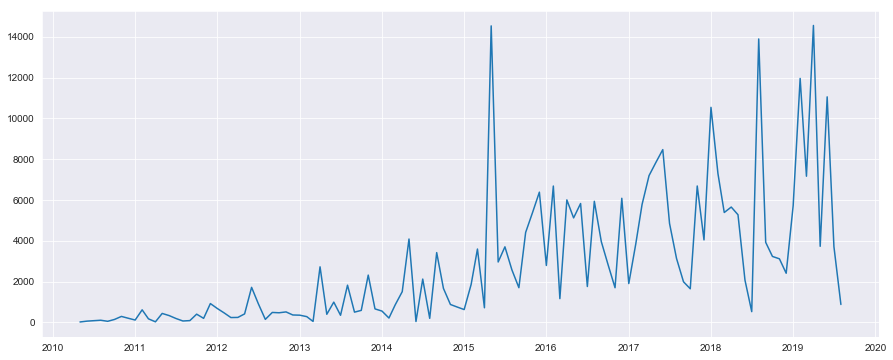

In [11]:
# Comenzaremos graficando la serie con el objetivo de confirmar ESTACIONARIEDAD de forma visual
plt.plot(tserie)

### Analisis de estacionariedad 

Según definición de estacionareidad, para que una serie temporal sea estacionaria deben cumplirse dos requisistos básicos: que la <b>media</b> y <b>varianza</b> (o desviación estándar) <i><b>sean constantes</b></i>.
A la vista del gráfico de la serie graficada, presenta tendencia y grandes variaciones, lo que nos hace advertir que la serie es NO ESTACIONARIA.


In [12]:
# Calculamos media y vairanza
print("Media Artimetica de la serie es:",tserie.mean())
print("La desviación tipoa de al sere es:",tserie.std())

Media Artimetica de la serie es: 2825.4360119047624
La desviación tipoa de al sere es: 3279.5416097822363


In [13]:
# La media anterior es la media de la serie, para verificar estacionariedad, debemos calcular medias moviles
# y desviación movil en un perido dterminado. Ejemplo: 12 meses.
mediamovil = tserie.rolling(window=12,center=True).mean()
desvmovil = tserie.rolling(window=12,center=True).std()


Lo que pretendemos calculando la media y desviación móvil es que cualquier instante 't', tomaremos el promedio / varianza del último año, es decir, los últimos 12 meses para confirmar , visualmente, que la media y varianza permanencen constantes.

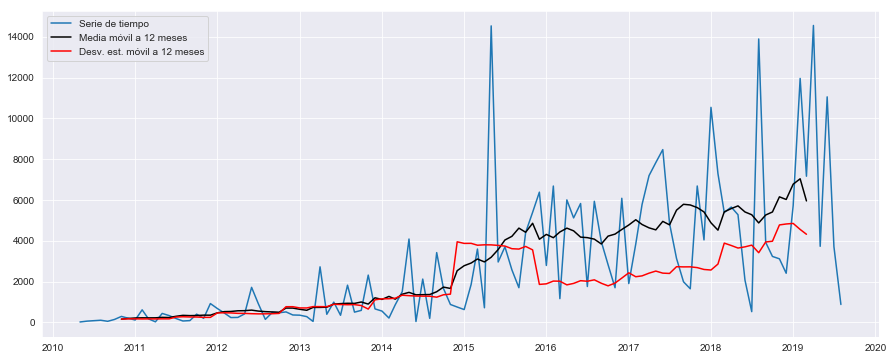

In [14]:
# Graficamos serie y media movil de 12 periodos mensuales
plt.plot(tserie, label="Serie de tiempo")
plt.plot(mediamovil,color='black', label="Media móvil a 12 meses")
plt.plot(desvmovil, color='red', label="Desv. est. móvil a 12 meses")
plt.legend(loc='best')

En el gráfico anterior, vemos que la media móvil tiene un componente de tendencia al igual que la desviación estándar móvil.

Para que nuestras series temporales sean estacionarias, debemos asegurarnos de que tanto las estadísticas continuas, es decir: media y desviación estándar permanecen invariantes o constantes con el tiempo. Por lo tanto, las curvas para ambos tienen que ser paralelas al eje x, que en nuestro caso no es así dado que se aprecia tendiencia

Para aumentar aún más nuestra hipótesis de que la serie temporal no es estacionaria, realicemos la prueba , en nuestro caso, de Dickey  Fuller.


Conclusión: La serie es  <b>NO ESTACIONARIA </b>  condición indispensable para aplicar algoritmos</b>.


### Prueba de hipotesis de estacionariedad con fundamentos estadísticos: test de Dickey-Fuller

Librería statsmodels contiene contiene la prueba estadística Dickey-Fuller de estacionariedad. El sentido de la prueba de hipotesis lo daría:

- El valor p debe ser bajo (de acuerdo con la hipótesis nula)
- Los valores críticos a intervalos de confianza del 1%, 5%, 10% deben estar lo más cerca posible de las Estadísticas de prueba

En este TEST de hipotesis la hipótesis esta asociada a NO ESTACINARIEDAD de la serie. Los resultados de la prueba se componen de un estadístico de prueba y algunos valores críticos para niveles de confianza diferentes. Si el "Estadístico de prueba" es menor que el "Valor crítico", podemos rechazar la hipótesis nula y decir que la serie es estacionaria. 

Una vez ejecutemos la prueba, iremos verificando si pasa o no el test de estacionariedad.


Definamos la siguiente función hacemos para hacer la prueba e imprimir los resultados automáticamente:

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determinar estadísticas móviles
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=True).std()

    # Graficar estadísticas móviles
    orig = plt.plot(timeseries, color='blue',label='Serie de tiempo')
    mean = plt.plot(rolmean, color='red', label='Media móvil')
    std = plt.plot(rolstd, color='black', label = 'Desv. est. móvil')
    plt.legend(loc='best')
    plt.title('Serie de tiempo con media y desv. est. móviles')
    plt.show(block=False)
    
    # Realizar prueba Dicket-Fuller
    dftest = adfuller(timeseries, autolag='AIC')
    tstat = dftest[0]; pvalue = dftest[1]; cvalues = dftest[4]
    print('Resultado de la prueba Dickey-Fuller')
    print("------------------")
    print("Estadística de prueba\t",tstat)
    print("p-value\t\t\t",pvalue)
    print("------------------")
    print("Valores críticos (la estadística de prueba debe ser MENOR)")
    for clevel in [10,5,1]:
        conf = 100-clevel
        cval = cvalues['%i%%' % clevel]
        if tstat < cval:
            comp = ">"
            verdict = "PASA"
        else:
            comp = "<"
            verdict = "FALLA"        
        print("Confianza %i%%\t\t%f %s %f ... %s" % (conf, cval, comp, tstat, verdict))

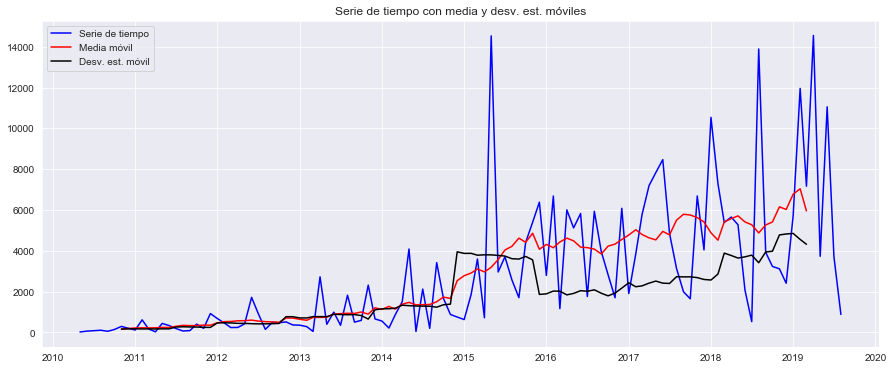

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 0.20996708515544696
p-value			 0.9728151093315668
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.582596 < 0.209967 ... FALLA
Confianza 95%		-2.891208 < 0.209967 ... FALLA
Confianza 99%		-3.498198 < 0.209967 ... FALLA


In [16]:
test_stationarity(tserie)

Vemos que la estadística de prueba es <b>mayor</b> que todos los valores críticos, por lo que <b>no podemos rechazar</b> la hipótesis nula de no-estacionariedad. La prueba de Dickey-Fuller nos confirma lo que sospechábamos.

Bibliografía : Time Series Analysis and Forecasting by Example Bisgaard and Kulahci

# Transformar la serie de tiempo en  estacionaria

La idea es que para modelar la serie de tiempo necesitamos primero hacerla estacionaria. Sólo entonces podremos usar alguno de los modelos de procesos estocásticos que hemos visto (ARIMA, SARIMA, OTROS)

## Estimando y eliminando la tendencia


Antes de extraer la tendencia vamos a transformar la serie de tiempo para reducir la no-estacionariedad de su varianza. Esto es opcional, pero usualmente ayuda a la extracción de la tendencia.

Una forma común de hacer esto es tomar el <b>logaritmo</b> de la serie de tiempo:

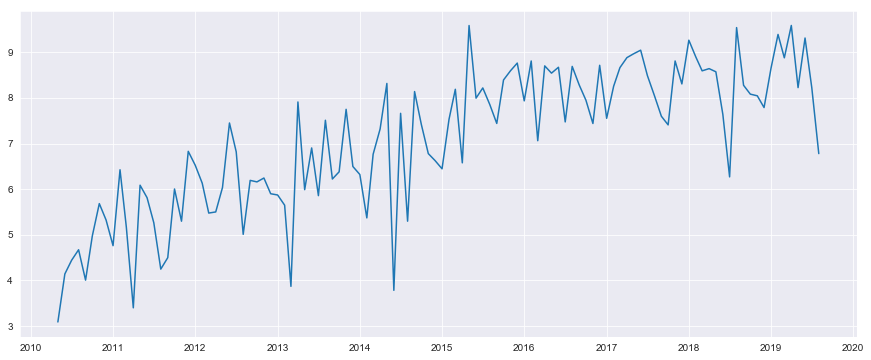

In [17]:
# Obsercar que la escala ha cambiado. 
ts_log = np.log(tserie)
plt.plot(ts_log)

## Suavizando para encontrar la tendencia

### Promediado móvil

La media móvil sirve no solamente para determinar la estacionariedad de la serie, sino también como una estimación simple de su tendencia.

En este enfoque, tomamos un promedio de "12" valores consecutivos dependiendo de la frecuencia de las series de tiempo. Aquí podemos tomar el promedio durante el último año, es decir, los últimos 12 valores. 

Esta vez tomamos la media móvil con los <i>últimos</i> 12 valores (meses):

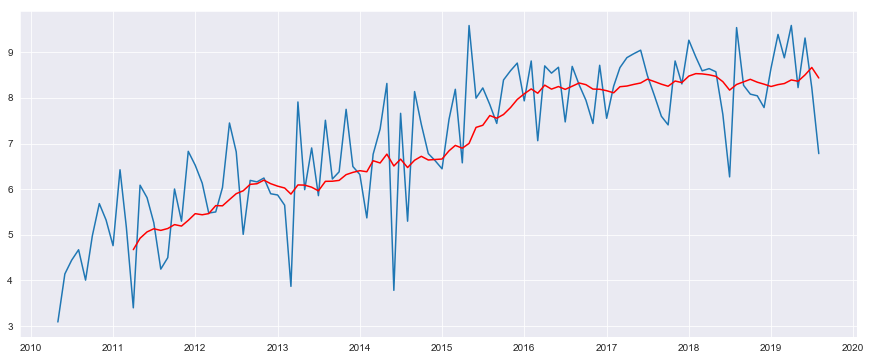

In [18]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Tomemos ahora la <b>diferencia</b> entre la serie y su promedio móvil:

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg

Nótese que no podemos calcular el promedio móvil para los primeros 11 valores, pues necesitamos promediar sobre 12 meses.

Esto se puede ver imprimiendo los primeros 12 valores de lo que hemos obtenido, y constatando que los primeros 11 son NaN (Not a Number):

In [20]:
ts_log_moving_avg_diff.head(12)

Mes
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01         NaN
2011-04-01   -1.273925
Name: teams, dtype: float64

Los quitamos con Pandas, con función dropna(), la cual elimina los NaNs:

In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Mes
2011-04-01   -1.273925
2011-05-01    1.162008
2011-06-01    0.750114
2011-07-01    0.131919
2011-08-01   -0.848641
Name: teams, dtype: float64

Podemos ahora sí ver si esto ha mejorado la estacionariedad de la serie, y por consiguiente, si podemos aplicar los correspondientes modelos ... Se puede verificar en la serie de tiempo siguiente.

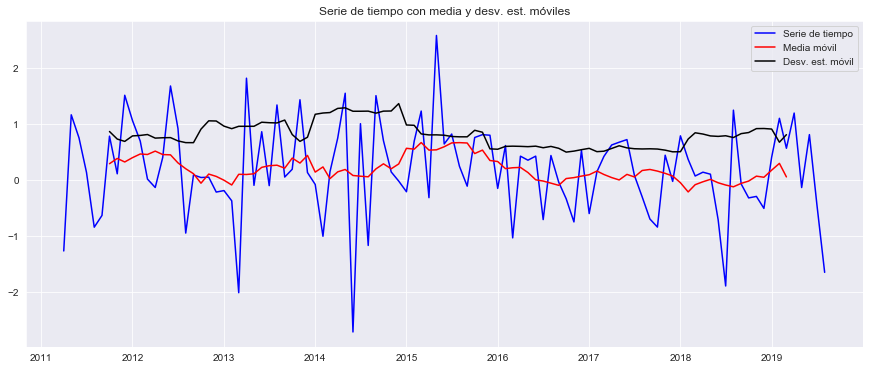

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -10.921051309499575
p-value			 1.0378257679022272e-19
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.582435 > -10.921051 ... PASA
Confianza 95%		-2.890906 > -10.921051 ... PASA
Confianza 99%		-3.497501 > -10.921051 ... PASA


In [23]:
# Aplicamos sobre la serie transformada el test de hipotesis de Dickey-Fuller para confirmar
test_stationarity(ts_log_moving_avg_diff)

## Eureka :
Vemos que ahora la serie <b>pasa</b> la prueba de estacionariedad a un nivel de confianza de 99%.Hemos convertido la serie en ESTACIONARIA Y podemos comenzar a aplicar los modelos que, de partida, partían de la base de estacinariedad de la serie.


## Capturando la tendencia y periodicidades (i.e. "estacionalidad")

Aunque hemos capturado bien la tendencia de la serie, aún queda claro que tiene variaciones periódicas ("estacionales", como las estaciones del año ... en este caso de hecho sí son estaciones, pero el término se usa de forma genérica).

Una manera popular de capturar la tendencia en la presencia de periodicidades de mediano o largo plazo es <b>diferenciando</b> la serie, es decir, tomando la aproximación discreta de su derivada.

La forma más sencilla de hacer esto es simplemente restar la serie movida en 1:

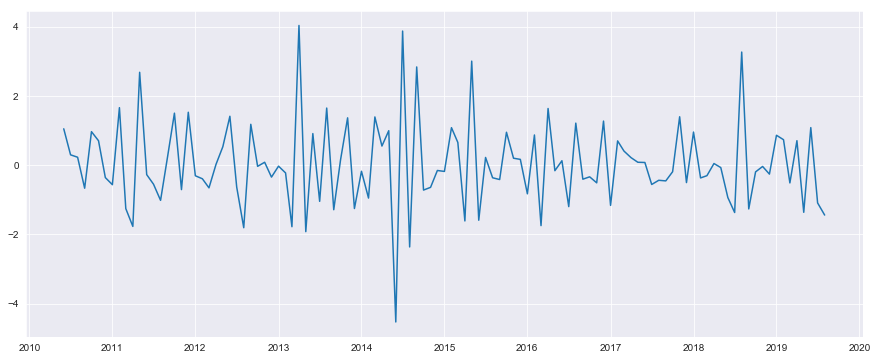

In [24]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

Descartando el primer valor (pues no tiene valor anterior), y corriendo la prueba de estacionariedad:

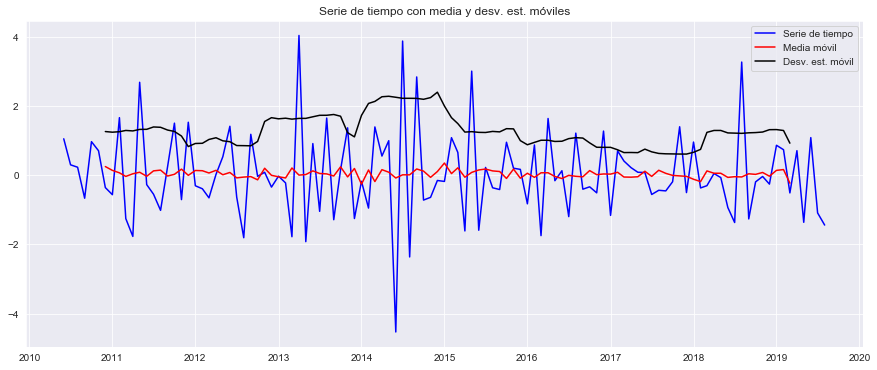

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -7.218439294010678
p-value			 2.1425082029338974e-10
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.581676 > -7.218439 ... PASA
Confianza 95%		-2.889485 > -7.218439 ... PASA
Confianza 99%		-3.494220 > -7.218439 ... PASA


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Modelado de la serie

Habiendo forzado la serie a ser estacionaria, podemos ahora usar los modelos de procesos estocásticos para modelar su variabilidad, lo cual es lo que queda una vez sustraidas la tendencia y la estacionalidad.

Para esto usaremos el modelo general ARIMA (Auto-Regressive Integrated Moving Average) de statsmodel, el cual permite combinar los varios tipos de modelos estocásticos.

ARIMA significa medias móviles integradas autorregresivas. El pronóstico ARIMA para una serie temporal estacionaria no es más que una ecuación lineal (como una regresión lineal). Los predictores dependen de los parámetros (p, d, q) del modelo ARIMA:

-(p): los términos AR son solo retrasos de la variable dependiente. Por ejemplo, si p es 5, los predictores para x (t) serán x (t-1) ... .x (t-5).

 -(q): los términos MA son errores de pronóstico rezagados en la ecuación de predicción. Por ejemplo, si q es 5, los predictores para x (t) serán e (t-1)… .e (t-5) donde e (i) es la diferencia entre el promedio móvil en el valor instantáneo y real.
 
 -(d): es el número de diferencias no estacionales, es decir, en este caso tomamos la diferencia de primer orden. Entonces, podemos pasar esa variable y poner d = 0 o pasar la variable original y poner d = 1. Ambos generarán los mismos resultados.



Un modelo ARIMA depende de tres parámetros:

$ARIMA(p,d,q)$

donde $p$ indica el orden de la componente autoregresiva, $d$ el orden de diferenciación y $q$ el orden de la componente de media móvil.

El valor de $d$ puede estimarse según el número de veces que se tiene que diferenciar la serie para obtener algo aproximadamente estacionario; en este caso, vimos que una diferenciación ($d=1$) bastaba.

Para estimar los valores de $p$ y $d$, calculamos las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) de la serie de tiempo. Statsmodel tiene herramientas para calcularlas.

### ACF & PACF Plots

A continuación se muestran las funciones de autocorrelación y autocorrelación parcial de la serie de tiempo (transformada y diferenciada, ya que esto da una serie casi estacionaria, como vimos).

La líneas punteadas indican los valores dentro de los cuales podemos decir que la autocorrelación es nula (comúnmente se escoge 95% de confianza, lo cual corresponde a 1.96 desviaciones estándares).

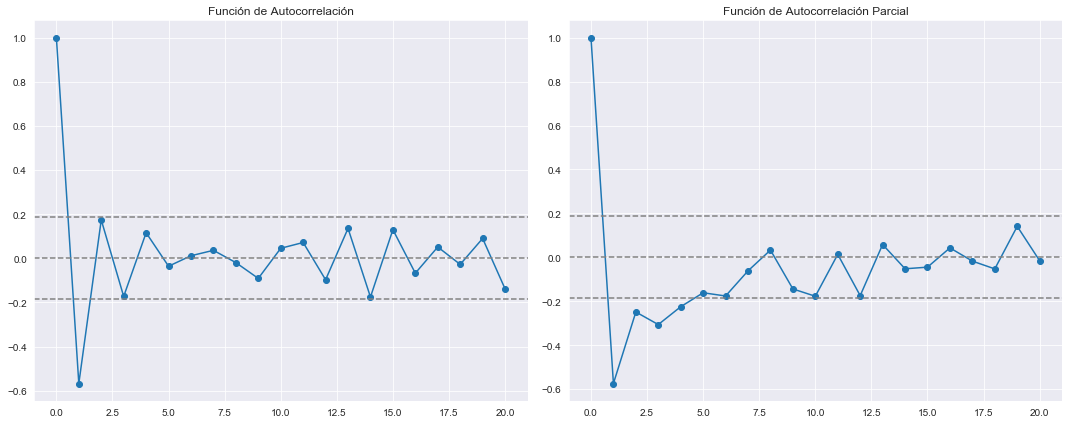

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf,"-o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf,"-o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial')
plt.tight_layout()

Usamos las gráficas para obtener los valores de $p$ y $q$ de la siguiente forma:
<ul>
<li>$q$ es el valor de x e el que la cruza el intervalo de confianza superior por primera vezen en el  gráfico de ACF.En este caso, $q=1$.</li>
<li>$p$ es el valor de x en el que la curva cruza el intervalo de confianza superior por primera vezen en el  gráfico de PACF, lo cual quiere decir que la correlación parcial ha desaparecido. En este caso, $p=1$.</li>
</ul>

Creemos ahora tres modelos diferentes: un modelo AR(1), uno MA(1) y su combinación para ver los resultado de los modelos de forma separada, y posteriormente probaremos el modelo ARIMA (p=1,d=1,q=1)

C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Javier Hernández\anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Javier Hernández\anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

Text(0.5, 1.0, 'RSS: 120.8697')

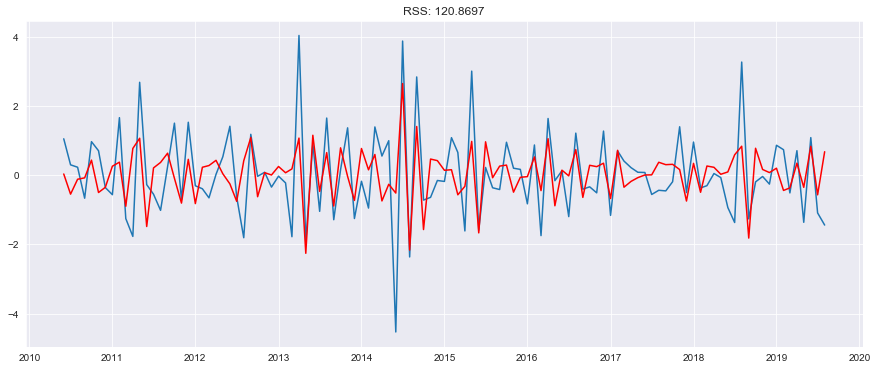

In [27]:
#AR model:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 94.3188')

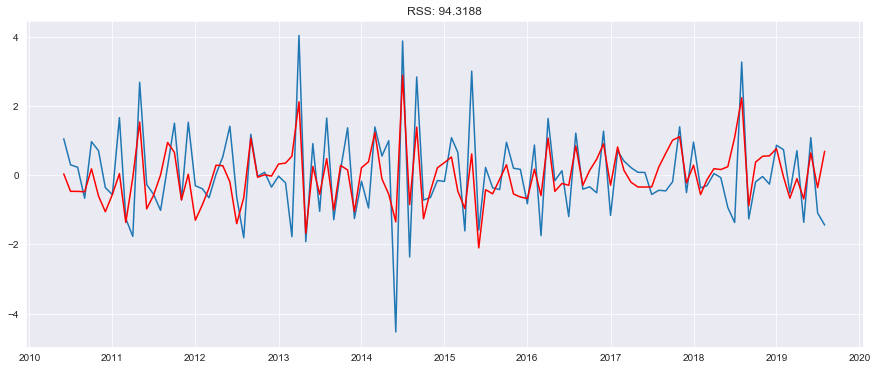

In [29]:
#MA model:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Como interpretacionAl combinar AR y MA en ARIMA, vemos que el valor de RSS ha disminuido de cualquier caso a 1.0292, lo que indica que ARIMA es mejor que sus modelos de componentes individuales.

Con el modelo ARIMA integrado, ahora generaremos predicciones. Pero, antes de hacer cualquier diagrama para las predicciones, necesitamos reconvertir las predicciones a su forma original. Esto se debe a que nuestro modelo se creó a partir de datos transformados de registro.



### Modelo combinado ARIMA

Finalmente, combinando los dos modelos:

C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Javier Hernández\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 93.2135')

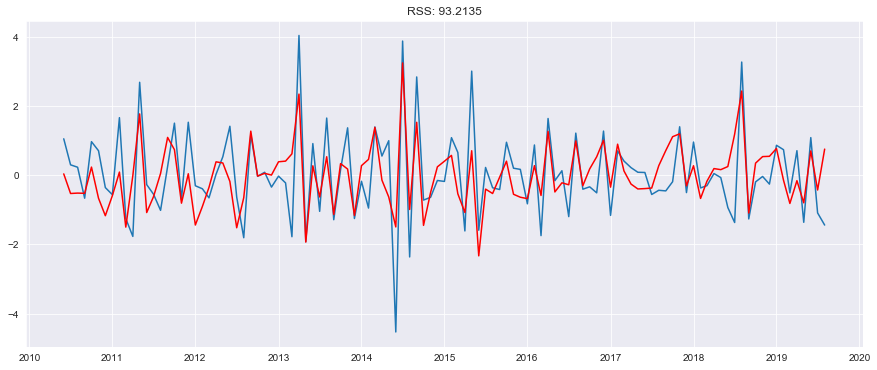

In [30]:
model = ARIMA(ts_log, order=(1, 1, 1))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Revirtiendo el modelo a la escala original

Finalmente, revertimos a la escala original aplicando las transformaciones inversas. 

Dado que el modelo combinado dio el mejor resultado, volvamos a escalarlo a los valores originales y veamos qué tal funciona.

El primer paso sería almacenar los resultados pronosticados como una serie separada y observarlo.

Primero, acumulamos para revertir la diferenciación:

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Mes
2010-06-01    0.037703
2010-07-01   -0.528876
2010-08-01   -0.517232
2010-09-01   -0.524227
2010-10-01    0.234087
dtype: float64


Se obserbva que los datos comienzan desde "2010-06" y no desde el primer mes (2010-05-01). 

Esto se debe a que tomamos un retraso de 1 y el primer elemento no tiene nada que restar. La forma de convertir la diferencia a escala de registro es agregar estas diferencias consecutivamente al número base. Una manera fácil de hacerlo es determinar primero la suma acumulativa en el índice y luego sumarla al número base. La suma acumulativa se puede encontrar como

In [52]:
#Convertir la suma acumulativa
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)


Mes
2010-06-01    0.037703
2010-07-01   -0.491173
2010-08-01   -1.008405
2010-09-01   -1.532632
2010-10-01   -1.298545
2010-11-01   -1.964955
2010-12-01   -3.135956
2011-01-01   -3.725954
2011-02-01   -3.635788
2011-03-01   -5.136393
2011-04-01   -5.147820
2011-05-01   -3.376629
2011-06-01   -4.456171
2011-07-01   -5.075737
2011-08-01   -5.025100
2011-09-01   -3.933226
2011-10-01   -3.194277
2011-11-01   -4.002576
2011-12-01   -3.961213
2012-01-01   -5.401341
2012-02-01   -6.305652
2012-03-01   -6.658626
2012-04-01   -6.272569
2012-05-01   -5.919631
2012-06-01   -6.101272
2012-07-01   -7.620768
2012-08-01   -8.270484
2012-09-01   -6.997485
2012-10-01   -7.023254
2012-11-01   -6.970186
                ...   
2017-03-01   -6.485861
2017-04-01   -6.742296
2017-05-01   -7.139930
2017-06-01   -7.527119
2017-07-01   -7.898646
2017-08-01   -7.625441
2017-09-01   -6.912470
2017-10-01   -5.800117
2017-11-01   -4.603958
2017-12-01   -4.913101
2018-01-01   -4.640039
2018-02-01   -5.311711
2018-03

Segundo, aplicamos el logaritmo inverso, i.e. la exponencial (además, agregamos de regreso el primer valor de la serie, el cual habíamos eliminado):

In [53]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()




C:\Users\Javier Hernández\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Mes
2010-05-01    3.091042
2010-06-01    4.180837
2010-07-01    3.951478
2010-08-01    3.664424
2010-09-01    2.474701
dtype: float64

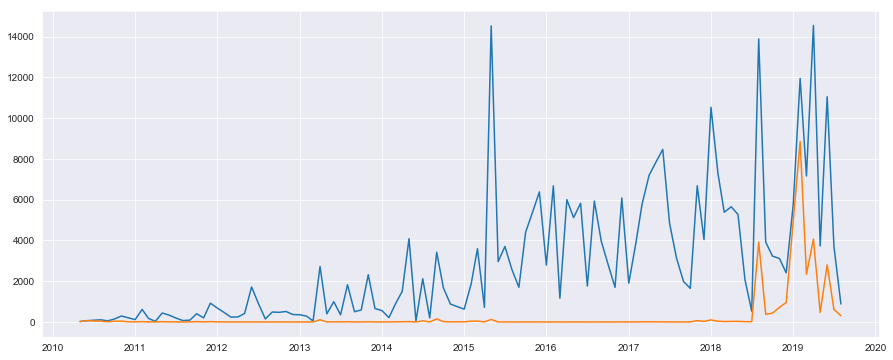

In [56]:
#Inverto del logaritimo 
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tserie)
plt.plot(predictions_ARIMA)


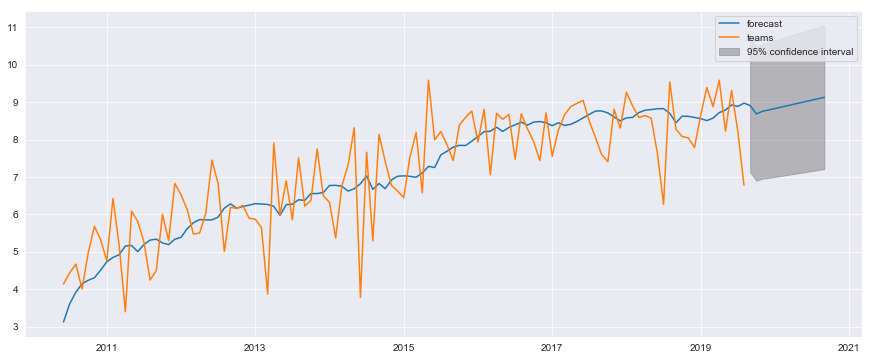

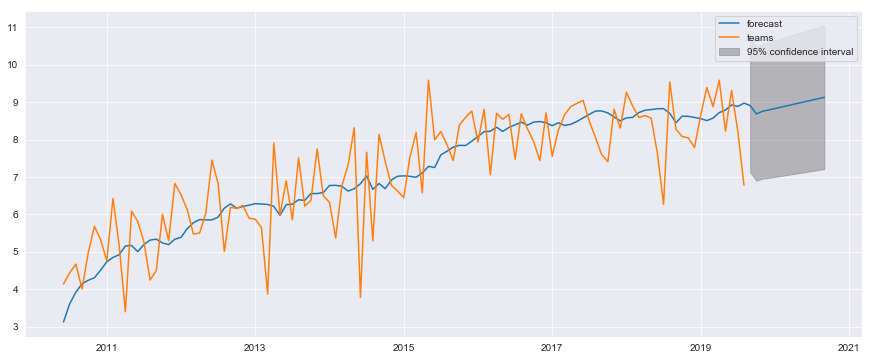

In [59]:
# A modográfico intervalo se confianza de las predicciones sobre serie convertida y sus predicciones

results_ARIMA.plot_predict(1,124)